In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers
import cPickle as pickle

# Load posteriors

In [2]:
trace = pickle.load(open('new_all_data_trace.p', 'rb'))
subj_data = pickle.load(open('new_all_data_subj.p', 'rb'))

# Plot diverging samples

826 divergences


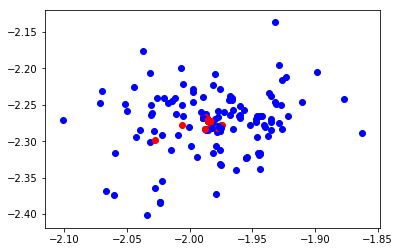

In [3]:
fig, ax = plt.subplots(1)

group = 0
var1 = 0
var2 = 1

num_divs = 0
for i, means in enumerate(trace['mu']):
    theta1 = means[group, var1]
    theta2 = means[group, var2]
    
    if trace['diverging'][i]:
        ax.scatter(theta1, theta2, c='r')
        num_divs += 1
        
    else:
        ax.scatter(theta1, theta2, c='b')
        
print '%d divergences' %(num_divs)
plt.show()

# Check funnel plot

--- Group 0 ---


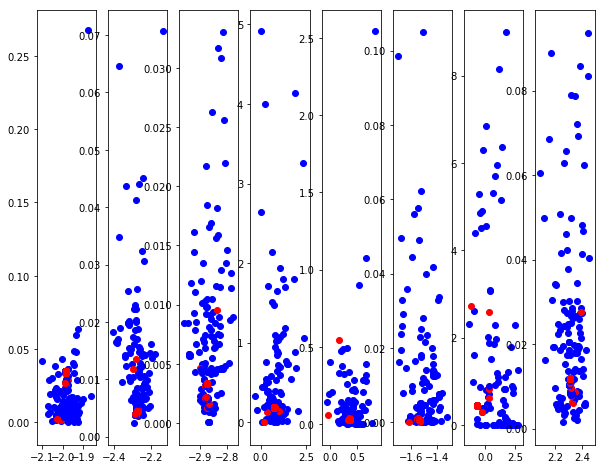

--- Group 1 ---


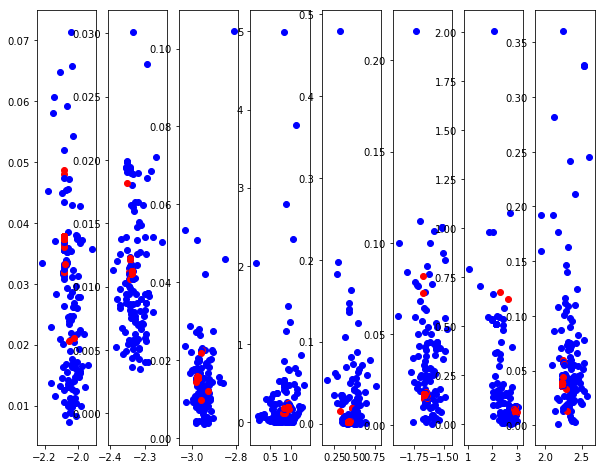

--- Group 2 ---


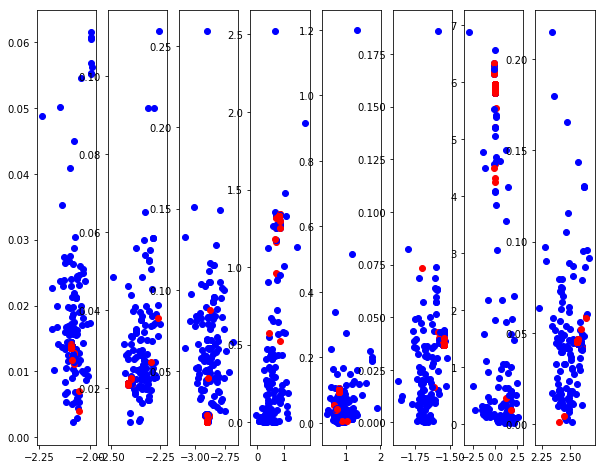

--- Group 3 ---


KeyboardInterrupt: 

In [4]:
for group in np.arange(trace['mu'].shape[1]):
    print '--- Group %d ---' %(group)
    chol_name = 'chol_cov%d' %(group)
    fig, axes = plt.subplots(1, 8, figsize = (10, 8))

    for var in np.arange(8):
        for i, means in enumerate(trace['mu']):
            groupmean = means[group, var]
            chol = trace[chol_name][i]
            cov = helpers.cov_from_chol(8, chol)
            groupvar = cov[var, var] # diagonal element is sd

            if trace['diverging'][i]:
                axes[var].scatter(groupmean, groupvar, c='r')

            else:
                axes[var].scatter(groupmean, groupvar, c='b')
        
    plt.show()

In [ ]:
print trace['mu'].shape[1]

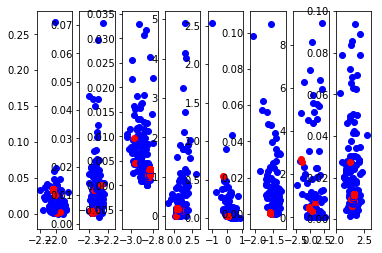

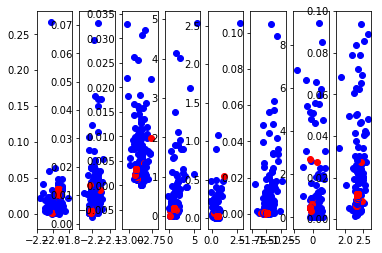

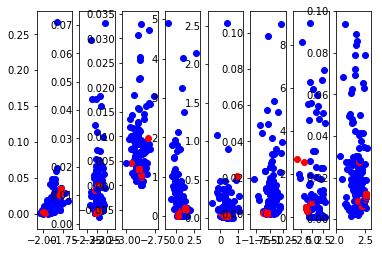

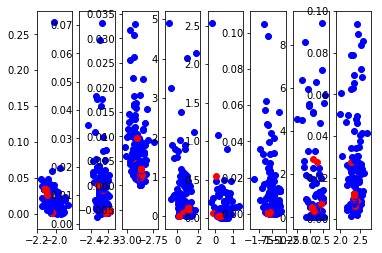

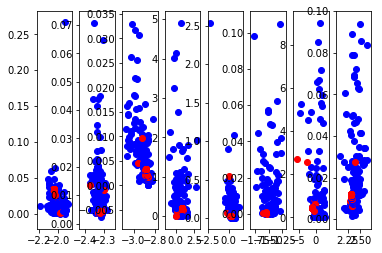

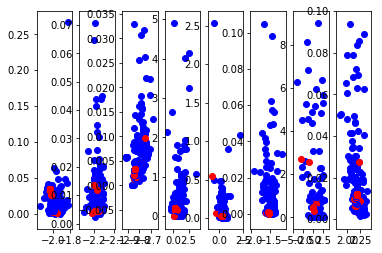

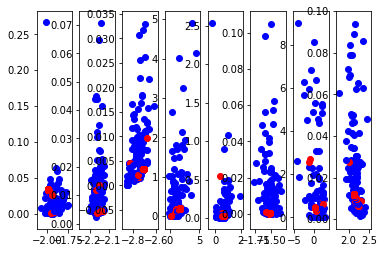

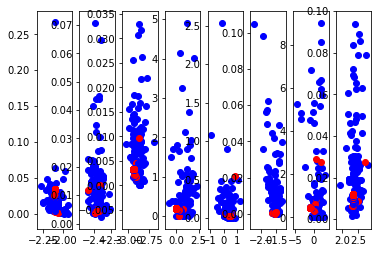

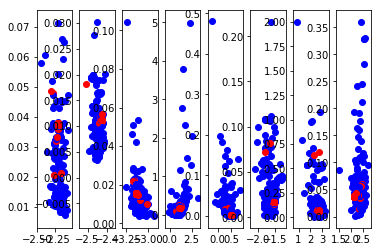

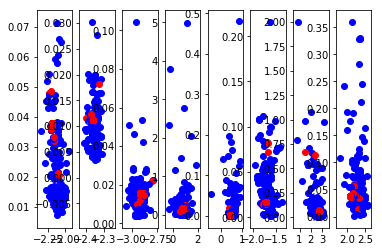

In [29]:
## Index mask
rat_idx = np.unique(trace['theta1'][0,:], return_index=True)[1]
rat_idx = sorted(rat_idx)

## Get group membership for each individual
counter = 0
group_dict = {}
for subj in subj_data:
    group_name = subj[0].split('/')[1]
    if group_name in group_dict.keys():
        continue
        
    else:
        group_dict[group_name] = counter
        counter += 1
        
group_ids = []
for subj in subj_data:
    group_name = subj[0].split('/')[1]
    group_ids.append(group_dict[group_name])
    
## Get posterior for individuals
full_post = helpers.get_dataset(trace, rat_idx)

## Get colour table for diverging/non-diverging samples
c = []
for isdiv in trace['diverging']:
    if isdiv:
        c.append('r')
    
    else:
        c.append('b')


## Iterate over individuals, getting cov matrix for each
for i in np.arange(len(rat_idx[:10])):
    fig, axes = plt.subplots(1,8)
    rat_post = full_post[:,:,i]
    rat_group = group_ids[i]
    chol_name = 'chol_cov%d' %(rat_group)
    
    for var in np.arange(8):
        for j in np.arange(rat_post[var,:].shape[0]):
            chol = trace[chol_name][j]        
            cov = helpers.cov_from_chol(8, chol)
            group_var = cov[var, var] # diagonal element is sd
            rat_var = rat_post[var, j]
            
            if trace['diverging'][j]:
                axes[var].scatter(rat_var, group_var, c='r')
                
            else:
                axes[var].scatter(rat_var, group_var, c='b')
            
    plt.show()